# Assignment A4.1

<div> 
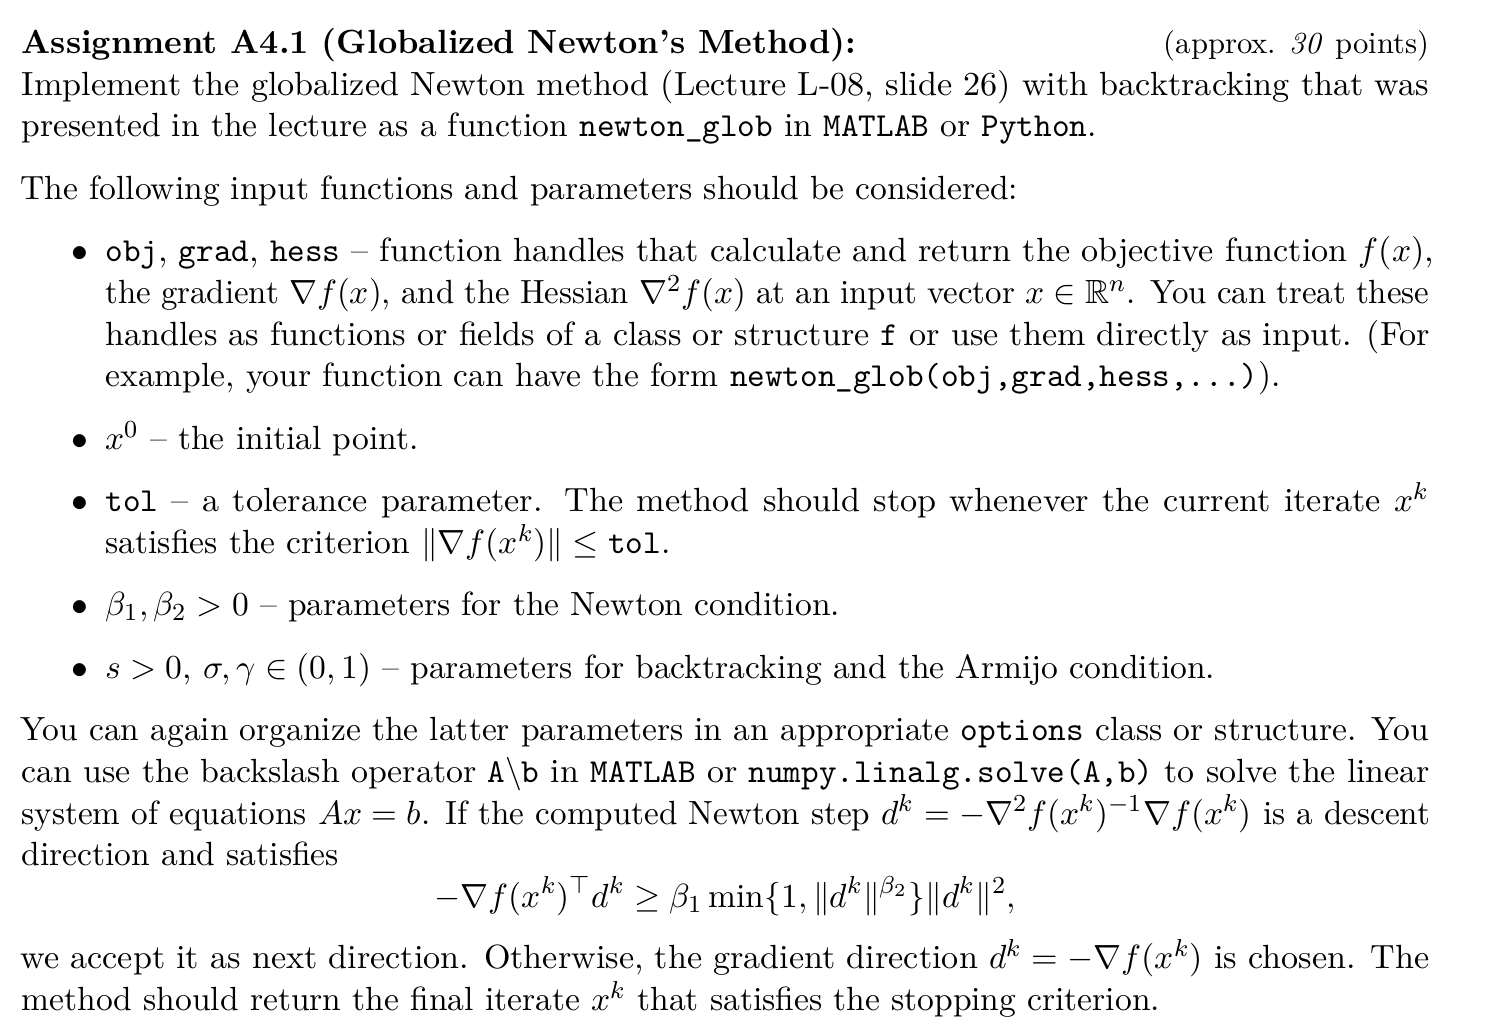
</div>

## Implement the Globalized Newton's Method

### Stepsize Strategies

In [1]:
#diminishing with pre-defined alpha_k 
diminishing = lambda k: 0.01/np.log10(k+2)

#exact by using golden section
#Note: w.r.t alpha, f is a 1-D function, this is why we can use golden section to perform exact line search

def exact(f, x_k: np.array, d_k: np.array, tol: float):
    """
    Input: funtion f, current point x_k, current_direction d_k, tolerence tol
    Output: current exact step size alpha_k by using golden section
    """
    phi = lambda alpha: f(x_k + alpha*d_k)
    alpha_k, _ = Golden_Section(phi, 0, 2, tol)
    
    return alpha_k

#backtrack(armijo)

def armijo(f, f_grad, x_k: np.array, d_k: np.array, s: float, sigma: float, gamma: float):
    """
    Input: funtion f, the gradient of f, current point x_k, current_direction d_k, parameters s, sigma and gamma
    Output: current step size alpha_k by backtracking

    """
    alpha_k = s
    while f(x_k + alpha_k*d_k) - f(x_k) > gamma*alpha_k*f_grad(x_k).dot(d_k):
        alpha_k *= sigma
    return alpha_k

### Write our Globalized Newton's Method

In [2]:
#define our stepsize_strategies dictionary
stepsize_strategies = {"diminishing": diminishing, "exact": exact, "backtrack": armijo}

def Newton_glob(f, f_grad, hess, x_0: np.array, tol: float, stepsize: str, max_iter: int, beta: tuple, armijo_para:tuple):
    """
    Input: funtion: f, the gradient of f: f_grad, the hessian of f, initial point: x_0, tolerence: tol, stepsize method: stepsize,
           maximium iteration times: max_iter, 
           beta: a tuple like (beta1, beta2), which is the parameter for Newton Condition
           armijo_para: 3-element tuple (s, sigma, gamma) for armijo line search
    Output: 2-d list: result. Every element of result is a list for each iteration. 
            e.g. ['iteration k', 'x_k', 'stepsize alpha_k', 'f(x_k)', 'norm of f_grad(x_k)']
    """
    x_k = np.array(x_0.tolist())
    k, alpha_k = 0, 0
    result = [['iteration k', 'x_k', 'alpha_k', 'f(x_k)', 'norm of f_grad(x_k)']]
    result.append([k, x_k.tolist(), alpha_k, f(x_k), np.linalg.norm(f_grad(x_k))])
    
    stepsize_strategy = stepsize_strategies[stepsize]

    while np.linalg.norm(f_grad(x_k))> tol:
        
        #Compute the Newton direction
        d_k = np.linalg.solve(hess(x_k), -f_grad(x_k))
        
        #check whether d_k is a good descent direction
        if -f_grad(x_k).dot(d_k) < beta[0]*min(1, np.linalg.norm(d_k)**beta[1])*np.linalg.norm(d_k)**2:
            d_k = -f_grad(x_k)
        
        #Choose the stepsize
        if stepsize == 'backtrack':
            alpha_k = stepsize_strategy(f, f_grad, x_k, d_k, s=armijo_para[0], sigma=armijo_para[1], gamma=armijo_para[2])
        elif stepsize == 'diminishing':
            alpha_k = stepsize_strategy(k)
        else:
            alpha_k = stepsize_strategy(f, x_k, d_k, 1e-6)
        
        x_k += alpha_k*d_k

        if k == max_iter:
            print('max iteration:',
                  k, 'the function value is', f(x_k), 'the norm of gradient is:', np.linalg.norm(f_grad(x_k)))
            break        
        
        k += 1
        
        result.append([k, x_k.tolist(), alpha_k, f(x_k), np.linalg.norm(f_grad(x_k))])
        
    return result

<div> 

</div>



<div> 

</div>

## Part a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

### For our parameters

#### f, f_grad and hess

In [2]:
#符号计算！Sympy!
import sympy
x1, x2 = sympy.symbols('x1, x2')
fun = (x1 - x2**3 + x2**2 - 2 * x2 + 3)**2 + (x1 + x2**2 - 3 * x2 + 3)**2
gradient = sympy.derive_by_array(fun, (x1, x2))
hessian = sympy.Matrix(sympy.derive_by_array(gradient, (x1, x2)))
from sympy.utilities.lambdify import lambdify
x = np.array([x1, x2])
_f = lambdify(x, fun)
_f_grad = lambdify(x, gradient)
_hess = lambdify(x, hessian)
f = lambda x: _f(x[0], x[1])
f_grad = lambda x: np.array(_f_grad(x[0], x[1]))
hess = lambda x: _hess(x[0], x[1])

In [3]:
x_0 = np.array([0, 0])

In [4]:
f(x_0)

18

In [6]:
f_grad(x_0).shape

(2,)

In [8]:
hess(x_0)

array([[  4, -10],
       [-10,  50]])

#### tol, max_iter, beta and armijo_para

In [9]:
tol = 1e-8
max_iter = 1e5
beta = (1e-6, 0.1)
armijo_para = (1, 0.5, 0.1)

#### uniform Initial points from 

In [18]:
from random import choice #default is uniform distribution
from numpy.random import random_sample
"""
random_sample:

Results are from the “continuous uniform” distribution over the stated interval. To sample Unif[a, b), b > a 
multiply the output of random_sample by (b-a) and add a: (b - a) * random_sample() + a
"""

p = 17

x1_left, x1_right = -10, 10
x2_left, x2_right = -2, 2


coordx1,coordx2=[],[]
for i in range(p):
    x1x2 = choice(['x1','x2'])
    if x1x2=='x1':
        coordx1.append(choice([x1_left, x1_right])) 
        coordx2.append((x2_right - x2_left) * random_sample() + x2_left) 
    if x1x2=='x2':
        coordx1.append((x1_right - x1_left) * random_sample() + x1_left) 
        coordx2.append(choice([x2_left, x2_right])) 

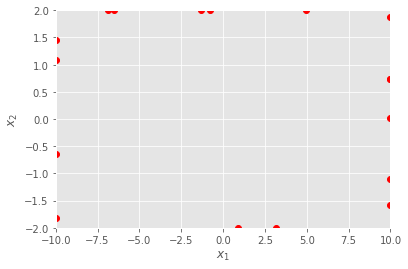

In [19]:
plt.xlim((x1_left, x1_right))
plt.ylim((x2_left, x2_right))

# Plot points
for i in range(p):
    plt.plot(coordx1[i],coordx2[i],'ro')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.savefig('uniform.png', bbox_inches='tight')

In [20]:
Uni_initail_points = np.array(list(zip(coordx1, coordx2)))
Uni_initail_points

array([[  4.97041254,   2.        ],
       [ 10.        ,   0.73776921],
       [ 10.        ,  -1.57322412],
       [  0.8784081 ,  -2.        ],
       [-10.        ,   1.44770187],
       [ 10.        ,  -1.09865556],
       [ 10.        ,   1.88243378],
       [ 10.        ,   0.02047346],
       [ -0.78972697,   2.        ],
       [  3.15400154,  -2.        ],
       [ 10.        ,   0.72981141],
       [ -1.32883956,   2.        ],
       [-10.        ,  -0.63972377],
       [ -6.87725528,   2.        ],
       [-10.        ,  -1.81367113],
       [ -6.52869237,   2.        ],
       [-10.        ,   1.07947058]])

### Solve by using Newton's method

In [21]:
result_list = []
for Uni_initial_ponit in Uni_initail_points:
    result = Newton_glob(f, f_grad, hess, Uni_initial_ponit, tol, stepsize='backtrack', max_iter=max_iter, beta=beta, armijo_para=armijo_para )
    result_list.append(result)

In [22]:
for i in result_list[16]:
    print(i)

['iteration k', 'x_k', 'alpha_k', 'f(x_k)', 'norm of f_grad(x_k)']
[0, [-10.0, 1.0794705831211489], 0, 167.9132229921119, 85.28046519816844]
[1, [-0.8552740541725949, 1.0710338041361354], 1, 0.012413121813683628, 0.38502994942352187]
[2, [-0.9698983318319973, 1.0158678685314426], 1, 0.0005341747822923325, 0.0826198549809521]
[3, [-0.9979989962373692, 1.0010568622183418], 1, 2.266671033523018e-06, 0.005174181110451061]
[4, [-0.9999903293478689, 1.0000051124498777], 1, 5.288949908290108e-11, 2.4982934028025868e-05]
[5, [-0.9999999997721737, 1.0000000001204472], 1, 2.9356616107230145e-20, 5.886600377212666e-10]


### Plot

In [23]:
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

In [24]:
xmin, xmax, xstep = -16, 11, .01
ymin, ymax, ystep = -3, 3, .01
_x1, _x2 = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(np.array((_x1, _x2)))

In [25]:
fig, ax = plt.subplots(figsize=(16, 10))

cp = ax.contour(_x1, _x2, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.clabel(cp, inline=1, fontsize=10)

###############
for i in range(p):
    points = [each[1] for each in result_list[i][1:]]
    point_x1 = [point[0] for point in points]
    point_x2 = [point[1] for point in points]

#     #Angles needed for quiver plot
#     anglesx1 = np.array(point_x1)[1:] - np.array(point_x1)[:-1]
#     anglesx2 = np.array(point_x2)[1:] - np.array(point_x2)[:-1]

#     #quiver
#     widths = np.linspace(0, 0.1, 10)
    
#     ax.quiver(point_x1[:-1], point_x2[:-1],
#               anglesx1, anglesx2,
#               scale_units = 'xy', angles = 'xy', 
#               scale = 1, alpha = .8, linewidths=widths)

    plt.plot(point_x1, point_x2, '-o', color='black')
    ax.plot(*points[0], 'ro', markersize=5)
    ax.plot(*points[-1], 'r*', markersize=18)
    

##############
        
ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

# set the x-spine 
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.savefig('sol_armijo.png', bbox_inches='tight')

### Report the behavior and performance of the Newton method

In [28]:
for i in range(17):
    print(result_list[i][-1][0])

8
16
9
10
7
6
6
4
9
10
15
9
861
9
9
9
5


In [32]:
result_list[12]

[['iteration k', 'x_k', 'alpha_k', 'f(x_k)', 'norm of f_grad(x_k)'],
 [0, [-10.0, -0.6397237748848803], 0, 47.32114252594491, 87.68428750119409],
 [1,
  [-5.13458536666739, -0.6386146040968979],
  1,
  0.07150600828455761,
  0.08447317074051458],
 [2,
  [-5.134585517299718, -0.639934497381123],
  0.015625,
  0.07146048689527745,
  0.027929473536931277],
 [3,
  [-5.135310348099882, -0.6394482944887118],
  0.03125,
  0.07145232408306018,
  0.03603695734691497],
 [4,
  [-5.135677577312398, -0.6405128918786968],
  0.03125,
  0.0714481430689016,
  0.04965001505138353],
 [5,
  [-5.136130626713689, -0.6398831433949864],
  0.015625,
  0.07143011919685252,
  0.022354723192028452],
 [6,
  [-5.137137598059978, -0.6408516955485277],
  0.0625,
  0.07141939267677208,
  0.04979061681685921],
 [7,
  [-5.1375925052426386, -0.6402205776300764],
  0.015625,
  0.07140126177155888,
  0.02247160336117382],
 [8,
  [-5.138604729358423, -0.6411942063863972],
  0.0625,
  0.07139044085452317,
  0.050087970958488

In [33]:
ave = 0
for i in range(17):
    ave += result_list[i][-1][0]
print(ave/17)

58.94117647058823


Text(0, 0.5, '$||\\nabla f(x_k)||$')

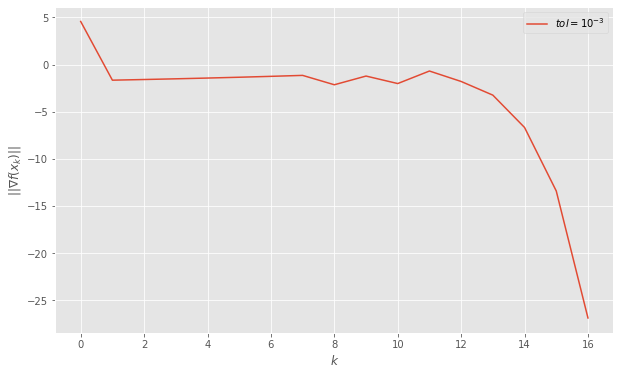

In [38]:
#Let's plot
plt.figure(figsize=(10, 6))
plt.plot([each_iter[0] for each_iter in result_list[1]][1:],
         np.log([each_iter[-1] for each_iter in result_list[1]][1:]),
         label=r'$tol = 10^{-3}$')
plt.legend()
plt.xlabel(r'$k$')
plt.ylabel(r'$||\nabla f(x_k)||$')
# plt.savefig('grad_exact.png', bbox_inches='tight')

## Part b)

### For our parameters

#### f, f_grad and hess

In [1]:
fun = 100*(x2 - x1**2)**2 + (1 - x1)**2
gradient = sympy.derive_by_array(fun, (x1, x2))
hessian = sympy.Matrix(sympy.derive_by_array(gradient, (x1, x2)))

NameError: name 'x2' is not defined

In [40]:
x = np.array([x1, x2])
_f = lambdify(x, fun)
_f_grad = lambdify(x, gradient)
_hess = lambdify(x, hessian)

In [41]:
f = lambda x: _f(x[0], x[1])
f_grad = lambda x: np.array(_f_grad(x[0], x[1]))
hess = lambda x: _hess(x[0], x[1])

#### tol, max_iter and beta, initial point and for armijo

with initial point x 0 = (−1.2, 1) > and parameter (s, σ, γ) = (1, 0.5, 10 −4 ) and (β 1 , β 2 ) =
(10 −6 , 0.1). (γ is smaller here). Besides the globalized Newton method also run the gradient
method with backtracking ((s, σ, γ) = (1, 0.5, 10 −4 )) on this problem and compare the
performance of the two approaches for different tolerances tol ∈ {10 −1 , 10 −3 , 10 −5 }.

In [42]:
tol_list = [1e-1, 1e-3, 1e-5]
max_iter = 1e5
beta = (1e-6, 0.1)
x_0 = np.array([-1.2, 1.])
armijo_para = (1, 0.5, 1e-4)

In [43]:
Newton_result_list = []
for tol in tol_list:
    result = Newton_glob(f, f_grad, hess, x_0, tol, stepsize='backtrack', max_iter=max_iter, beta=beta, armijo_para=armijo_para )
    Newton_result_list.append(result)

In [44]:
for i in Newton_result_list[2]:
    print(i)

['iteration k', 'x_k', 'alpha_k', 'f(x_k)', 'norm of f_grad(x_k)']
[0, [-1.2, 1.0], 0, 24.199999999999996, 232.86768775422664]
[1, [-1.1752808988764045, 1.380674157303371], 1, 4.731884325266608, 4.639426214066756]
[2, [-0.9329814276198116, 0.8112106557969638], 0.125, 4.08739866207212, 28.55008047767082]
[3, [-0.7825400789708418, 0.5897363758123704], 1, 3.2286725886219645, 11.571520864203748]
[4, [-0.4599971190698633, 0.1075633885708897], 1, 3.2138980914461612, 30.325894552338138]
[5, [-0.39304563414146043, 0.1500023691835446], 1, 1.942585420621621, 3.6041022542257752]
[6, [-0.20941190910188814, 0.006770126701199586], 0.25, 1.6001936936469847, 9.24841836786315]
[7, [-0.06571902139585198, -0.01632865620407108], 1, 1.178389561005322, 4.91980067977131]
[8, [0.14204254517035628, -0.022988783903572285], 1, 0.9224115819229626, 8.664340213940633]
[9, [0.23110719756120618, 0.04547802445909145], 1, 0.5974886167898775, 1.7788142872507977]
[10, [0.3797428192167952, 0.11814580456902472], 0.5, 0.452

In [45]:
#Let's plot
plt.figure(figsize=(10, 6))
plt.plot([each_iter[0] for each_iter in Newton_result_list[0]][1:],
         np.log([each_iter[-1] for each_iter in Newton_result_list[0]][1:]),
         label=r'$tol = 10^{-1}$')
plt.legend()
plt.xlabel(r'$k$')
plt.ylabel(r'$||\nabla f(x_k)||$')
plt.savefig('New_tolneg1.png', bbox_inches='tight')

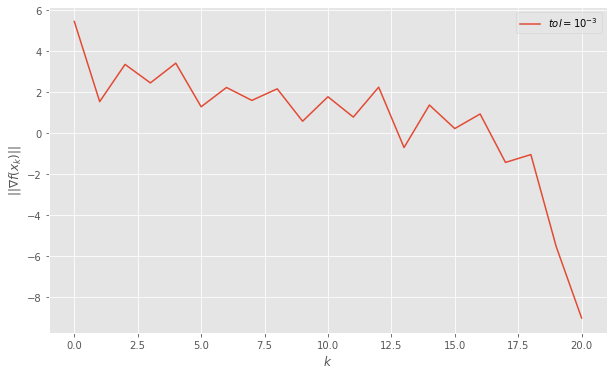

In [46]:
#Let's plot
plt.figure(figsize=(10, 6))
plt.plot([each_iter[0] for each_iter in Newton_result_list[1]][1:],
         np.log([each_iter[-1] for each_iter in Newton_result_list[1]][1:]),
         label=r'$tol = 10^{-3}$')
plt.legend()
plt.xlabel(r'$k$')
plt.ylabel(r'$||\nabla f(x_k)||$')
plt.savefig('New_tolneg3.png', bbox_inches='tight')

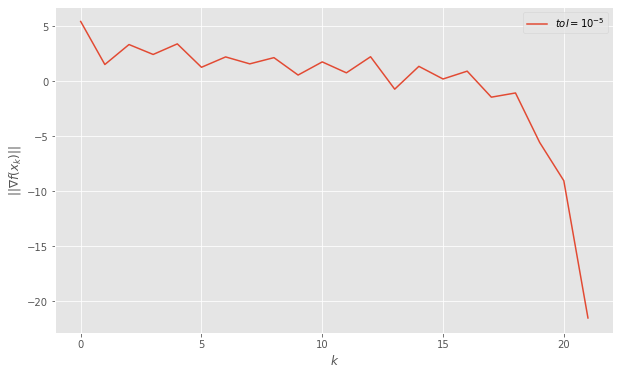

In [47]:
#Let's plot
plt.figure(figsize=(10, 6))
plt.plot([each_iter[0] for each_iter in Newton_result_list[2]][1:],
         np.log([each_iter[-1] for each_iter in Newton_result_list[2]][1:]),
         label=r'$tol = 10^{-5}$')
plt.legend()
plt.xlabel(r'$k$')
plt.ylabel(r'$||\nabla f(x_k)||$')
plt.savefig('New_tolneg5.png', bbox_inches='tight')

> **For Gradient Descent Method**

In [48]:
def gradient_method(f, f_grad, x_0: np.array, tol: float, stepsize: str, max_iter: int, armijo_para:tuple):
    """
    Input: funtion: f, the gradient of f: f_grad, initial point: x_0, tolerence: tol, stepsize method: stepsize,
           maximium iteration times: max_iter,  
           armijo_para: 3-element tuple (s, sigma, gamma) for armijo line search
    Output: 2-d list: result. Every element of result is a list for each iteration. 
            e.g. ['iteration k', 'x_k', 'stepsize alpha_k', 'f(x_k)', 'norm of f_grad(x_k)']
    """
    x_k = np.array(x_0.tolist())
    k, alpha_k = 0, 0    
    
    result = [['iteration k', 'x_k', 'alpha_k', 'f(x_k)', 'norm of f_grad(x_k)']]
    result.append([k, x_k.tolist(), alpha_k, f(x_k), np.linalg.norm(f_grad(x_k))])
    
    stepsize_strategy = stepsize_strategies[stepsize]
    
    
    while np.linalg.norm(f_grad(x_k)) > tol:
        
        d_k = -f_grad(x_k)
        
        if stepsize == 'backtrack':
            alpha_k = stepsize_strategy(f, f_grad, x_k, d_k,  s=armijo_para[0], sigma=armijo_para[1], gamma=armijo_para[2])
        elif stepsize == 'diminishing':
            alpha_k = stepsize_strategy(k)
        else:
            alpha_k = stepsize_strategy(f, x_k, d_k, 1e-6)
        
        x_k += alpha_k*d_k
        
        if k == max_iter:
            print('max iteration:',
                  k, 'the function value is', f(x_k), 'the norm of gradient is:', np.linalg.norm(f_grad(x_k)))
            break        
        
        k += 1
        
        result.append([k, x_k.tolist(), alpha_k, f(x_k), np.linalg.norm(f_grad(x_k))])
        
    return result

In [49]:
GD_result_list = []
for tol in tol_list:
    result = gradient_method(f, f_grad, x_0, tol=tol, stepsize='backtrack', max_iter=max_iter, armijo_para=armijo_para)
    GD_result_list.append(result)

In [50]:
for i in GD_result_list[0]:
    print(i)

['iteration k', 'x_k', 'alpha_k', 'f(x_k)', 'norm of f_grad(x_k)']
[0, [-1.2, 1.0], 0, 24.199999999999996, 232.86768775422664]
[1, [-0.9894531249999999, 1.0859375], 0.0009765625, 5.101112663710957, 43.89852092322499]
[2, [-1.0643320904579014, 1.0441718697547913], 0.001953125, 5.047011137654621, 45.46014402202028]
[3, [-1.0234514645128605, 1.0614825980797318], 0.0009765625, 4.1140390714609625, 3.2789770922880503]
[4, [-1.0267651031888638, 1.0560022473507424], 0.001953125, 4.108085021297817, 3.3509138580421087]
[5, [-1.0202563808475194, 1.0553164386693736], 0.001953125, 4.10215271407615, 3.4129600330308154]
[6, [-1.0238373428835006, 1.0496940339782426], 0.001953125, 4.096128168072973, 3.465560510278063]
[7, [-1.0170924472957374, 1.0491271865971896], 0.001953125, 4.090124601875364, 3.5063757616506566]
[8, [-1.0208542322682348, 1.0434044755615814], 0.001953125, 4.084010868429543, 3.5357514479062138]
[9, [-1.0139660606926788, 1.0429118536781383], 0.001953125, 4.077917974154677, 3.5522666227

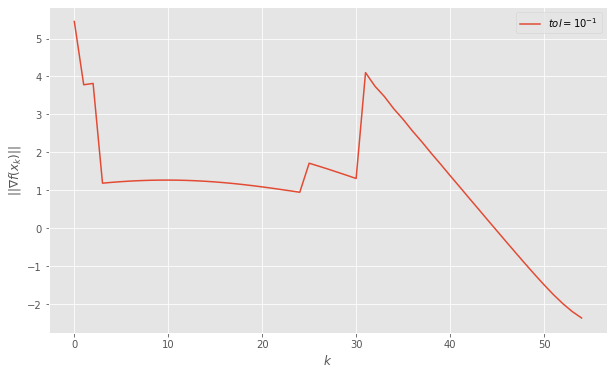

In [51]:
#Let's plot
plt.figure(figsize=(10, 6))
plt.plot([each_iter[0] for each_iter in GD_result_list[0]][1:],
         np.log([each_iter[-1] for each_iter in GD_result_list[0]][1:]),
         label=r'$tol = 10^{-1}$')
plt.legend()
plt.xlabel(r'$k$')
plt.ylabel(r'$||\nabla f(x_k)||$')
plt.savefig('grad_tolneg1.png', bbox_inches='tight')

In [52]:
#Let's plot
plt.figure(figsize=(10, 6))
plt.plot([each_iter[0] for each_iter in GD_result_list[1]][1:],
         np.log([each_iter[-1] for each_iter in GD_result_list[1]][1:]),
         label=r'$tol = 10^{-3}$')

plt.legend()
plt.xlabel(r'$k$')
plt.ylabel(r'$||\nabla f(x_k)||$')
plt.savefig('grad_tolneg3.png', bbox_inches='tight')

In [53]:
#Let's plot
plt.figure(figsize=(10, 6))
plt.plot([each_iter[0] for each_iter in GD_result_list[2]][1:],
         np.log([each_iter[-1] for each_iter in GD_result_list[2]][1:]),
         label=r'$tol = 10^{-5}$')

plt.legend()
plt.xlabel(r'$k$')
plt.ylabel(r'$||\nabla f(x_k)||$')
plt.savefig('grad_tolneg5.png', bbox_inches='tight')

In [54]:
for i in range(3):
    print(GD_result_list[i][-1])
    print(Newton_result_list[i][-1])

[54, [0.9310274465824229, 0.8663652458550941], 0.001953125, 0.0047771815497498525, 0.09379736888310351]
[19, [0.9994793790596765, 0.9989483423579631], 1, 2.8246694907172967e-07, 0.0038741872923914256]
[5231, [0.999209715931691, 0.9984184735890513], 0.001953125, 6.247994415637484e-07, 0.0009994007653633481]
[20, [0.9999988896181431, 0.9999975093462988], 1, 8.517074945566648e-12, 0.00011871675910486778]
[10916, [0.9999921836179707, 0.9999843200524469], 0.001953125, 6.131903315956525e-11, 9.997088788881386e-06]
[21, [0.9999999999400544, 0.9999999998788758], 1, 3.745507719522765e-21, 4.4741768673223994e-10]


# Assignment A4.2

<div> 
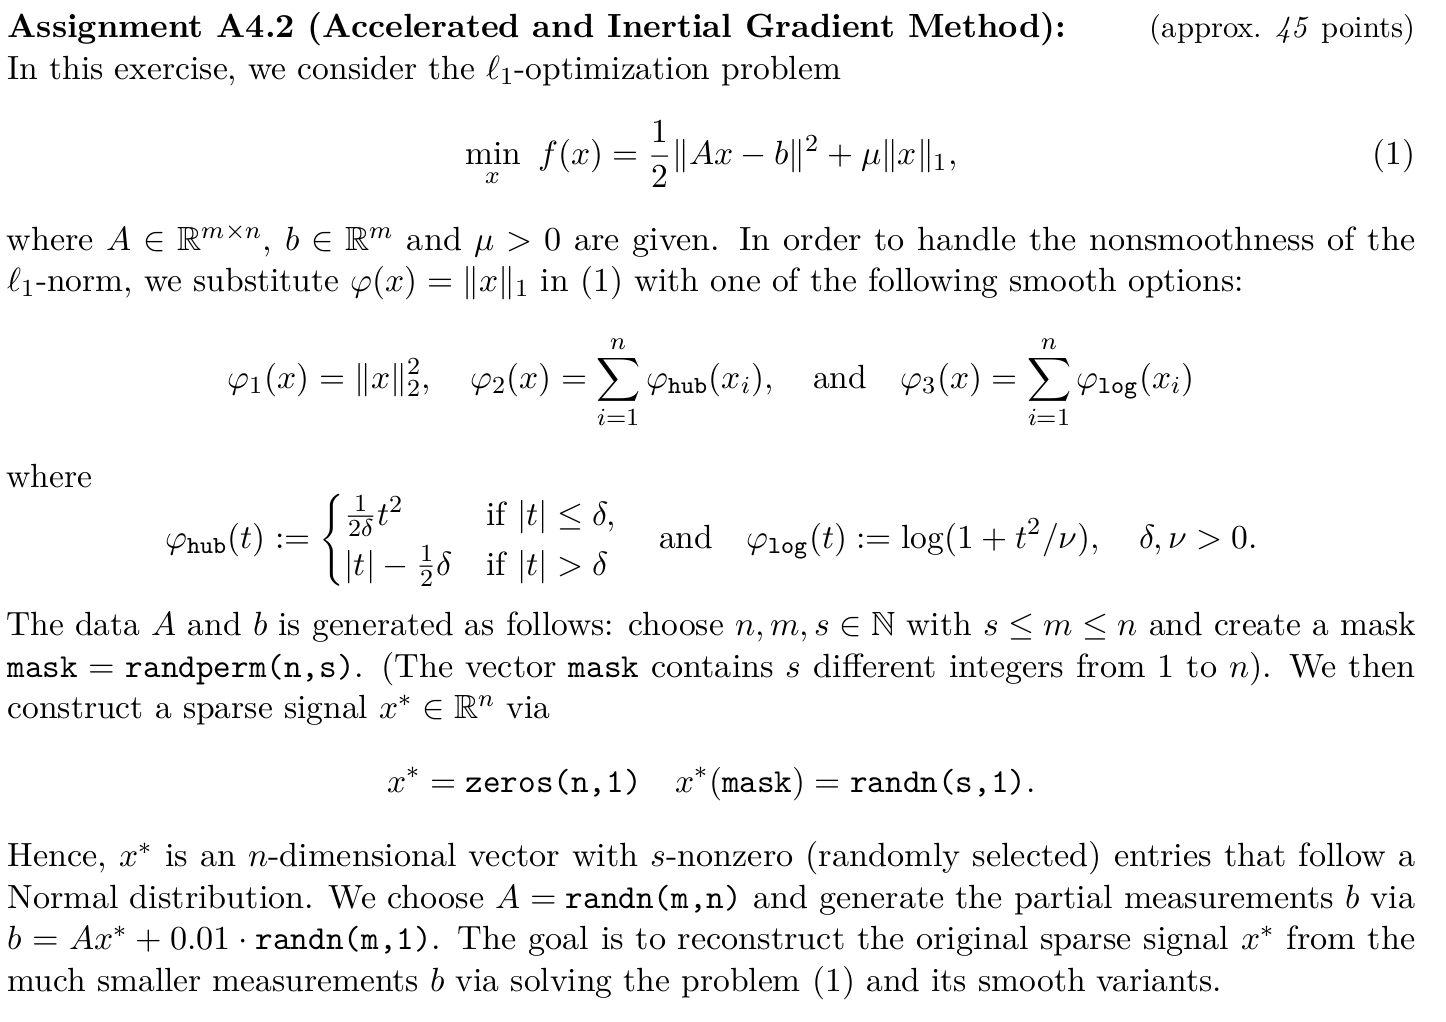
</div>

### Generate mask, $x^*$ A and b

In [ ]:
n, m, s = 9, 9, 6  

In [ ]:
mask = np.random.permutation(range(n))[:s]
mask

In [ ]:
x_star = np.zeros((n, 1))
x_star[mask] = np.random.randn(s, 1)
x_star

In [ ]:
A = np.random.randn(m, n)
A

In [ ]:
b = A.dot(x_star)+0.01*np.random.randn(m,1)
b

In [27]:
np.random.seed(1997)
np.random.permutation(range(3)), np.random.randn(2, 1)

(array([0, 2, 1]),
 array([[ 0.04940778],
        [-0.7985665 ]]))

In [28]:
def Generate_Data(n: int, m: int, s: int):
    np.random.seed(1997)
    mask = np.random.permutation(range(n))[:s]
    x_star = np.zeros((n, 1))
    x_star[mask] = np.random.randn(s, 1)
    A = np.random.randn(m, n)
    b = A.dot(x_star)+0.01*np.random.randn(m,1)
    
    return mask, x_star, A, b

In [29]:
mask, x_star, A, b = Generate_Data(3000, 300, 30)

### Define $\varphi_1, \varphi_2, \varphi_3$

#### For $\varphi_1$

In [4]:
phi1 = lambda x: np.linalg.norm(x)**2 # x -> np.array

#### For $\varphi_2$

In [5]:
def phi2(x: np.array, delta: float):
    """
    delta should be positive
    use 1-d Huber-norm
    """
    Hub_sum = 0
    for t in x:
        if np.abs(t) <= delta:
            Hub_sum += t**2/(2*delta)
        else:
            Hub_sum += np.abs(t) - delta/2
    return Hub_sum

#### For $\varphi_3$

In [6]:
def phi3(x: np.array, v: float):
    """
    v should be positive
    use smooth, nonconvex alternative to the l1-norm: log
    """
    Log_sum = 0
    for t in x:
        Log_sum += np.log(1+t**2/v)
    return Log_sum

### Generate $f, \nabla f$

In [7]:
def f(x: np.array, mu: float, phi):
    """
    mu: regularization parameter
    phi: regularization term, a function here with already specified parameters if it has.
    """
    return 0.5*np.linalg.norm(A.dot(x) - b)**2 + mu*phi(x)

In [30]:
x_0 = np.zeros_like(x_star)
mu = 0.1
f(x_0, mu, phi1)

5039.686899125629

#### for $\nabla f$: hard, divide into non-regularization part + regularization part

##### for non-regularization part: $∇f (x) = A^{\top}Ax − A^{\top}b$

In [9]:
grad_non_reg = lambda x: np.transpose(A).dot(A.dot(x) - b)

In [ ]:
A.shape, b.shape

In [ ]:
grad_non_reg(x_0)

##### For regularization Part: it depends on different $\varphi$ (without regularization parameter)

In [10]:
#for phi1
grad_reg_phi1 = lambda x: 2*x 

In [11]:
grad_reg_phi1(x_0)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [12]:
#for phi2
def grad_reg_phi2(x: np.array, delta: float):
    """
    delta should be positive
    use 1-d Huber-norm's derivative
    """
    x_copy = x.copy()
    x_copy[np.where(np.abs(x) <= delta)[0]] = x_copy[np.where(np.abs(x) <= delta)[0]]/delta
    x_copy[np.where(np.abs(x) > delta)[0]] = np.sign(x_copy[np.where(np.abs(x) > delta)[0]])

    return x_copy

> Test for fastest way to implement grad_reg_phi2
<!-- def grad_reg_phi2(x: np.array, delta: float):
    """
    delta should be positive
    use 1-d Huber-norm's derivative
    """
    x_copy = x.copy()
    for i in range(len(x)):
        x_copy[i] = x_copy[i]/delta if np.abs(x_copy[i]) <= delta else np.sign(x_copy[i])
    return x_copy -->
    
<!-- mapping = lambda x: x/delta if np.abs(x) <= delta else np.sign(x)
vfunc = np.vectorize(mapping)
import time
x = np.array([1, 2, 3, -1, -2]*30000).reshape(150000,1)
start = time.time()
x[np.where(np.abs(x) > 2)[0]] = -1
x[np.where(np.abs(x) <= 2)[0]] = 1
time.time() - start
#######0.008139610290527344########
###################################
start = time.time()
vfunc(x)
time.time() - start
#######0.555884599685669########
###################################
start = time.time()
np.array(list(map(mapping, x)))
time.time() - start
#######0.5064635276794434########
###################################
start = time.time()
grad_reg_phi2(x, delta)
time.time() - start
#######0.4901907444000244########
###################################
 -->

In [ ]:
grad_reg_phi2(x_0, 4)

In [13]:
#for phi3
def grad_reg_phi3(x: np.array, v: float):
    """
    v should be positive
    use log-norm's derivative
    """
    x_copy = x.copy()
    for i in range(len(x)):
        x_copy[i] = 2*x_copy[i]/(v+x_copy[i]**2)
    return x_copy

In [ ]:
grad_reg_phi3(x_0, 1e-4)

##### Try to combine these two parts

In [ ]:
grad_non_reg(x_0) + grad_reg_phi1(x_0)

In [ ]:
grad_non_reg(x_0) + grad_reg_phi2(x_0, 10)

In [ ]:
grad_non_reg(x_0) + grad_reg_phi3(x_0, 1e-4)

> Maybe fine

## Part a)

<div> 
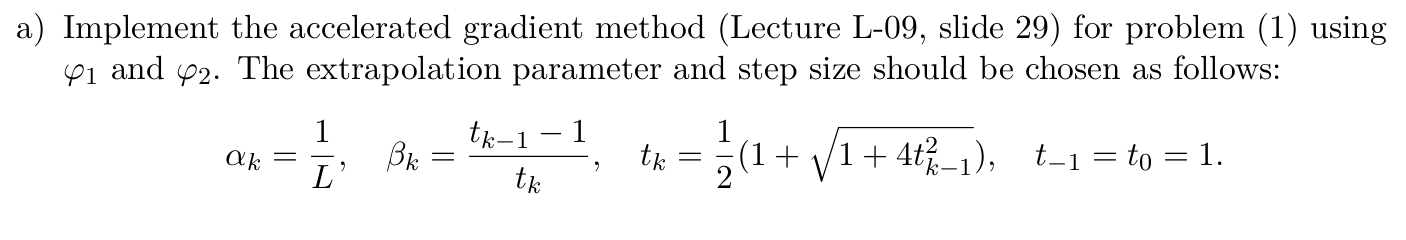
</div>

<div> 
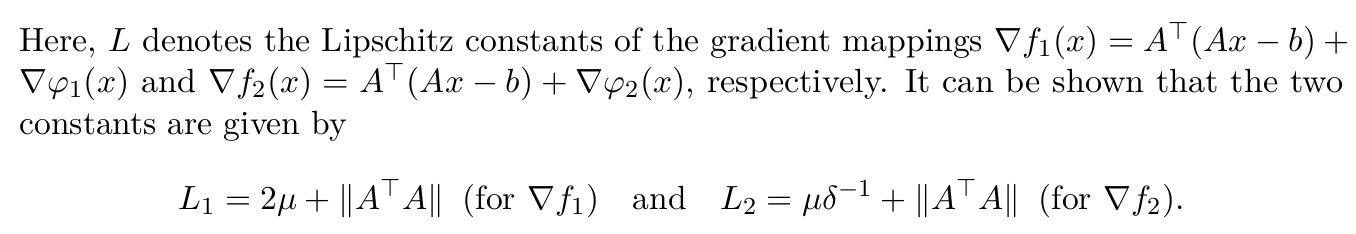
</div>

### AGM for Problem (1)

In [14]:
def AGM(f, f_grad, x_0: np.array, tol: float, max_iter: int, L: float):
    """
    Input: funtion: f, the gradient of f: f_grad, initial point: x_0, tolerence: tol,
           maximium iteration times: max_iter, L: Lipschitz Constant  
           
    Output: 2-d list: result. Every element of result is a list for each iteration. 
            e.g. ['iteration k', 'x_k', 'stepsize alpha_k', 'f(x_k)', 'norm of f_grad(x_k)']
    """
    x_pre = np.array(x_0.tolist())
    x_k = np.array(x_0.tolist()) #x_next
    k = 0
    
    t_pre, t_next = 1, 1
    beta_k = 0
    y_k = x_pre
    alpha_k = 1/L 
    
    result = [['iteration k', 'x_k', 'alpha_k', 'f(x_k)', 'norm of f_grad(x_k)']]
    result.append([k, x_k.tolist(), alpha_k, f(x_k), np.linalg.norm(f_grad(x_k))])
    
    
    while np.linalg.norm(f_grad(x_k)) > tol:
        
        x_k = y_k - alpha_k*f_grad(y_k)
        
        t_pre, t_next = t_next, (1 + np.sqrt(1+4*t_pre**2))/2
        beta_k = (t_pre - 1)/t_next
        y_k = x_k + beta_k*(x_k - x_pre)
        
        #Remember to update x_pre!
        x_pre = x_k
        
        if k == max_iter:
            print('max iteration:',
                  k, 'the function value is', f(x_k), 'the norm of gradient is:', np.linalg.norm(f_grad(x_k)))
            break        
        
        k += 1
        
        result.append([k, x_k.tolist(), alpha_k, f(x_k), np.linalg.norm(f_grad(x_k))])
        
    return result

### Some initial values

In [ ]:
x_0 = np.zeros_like(x_star)
x_0

In [ ]:
mu = 10

### Using $\varphi_1$

#### For L1

In [ ]:
L1 = 2*mu + np.linalg.norm(np.transpose(A).dot(A))
L1

#### For result

In [ ]:
result = AGM(f=lambda x: f(x=x, mu=mu, phi=phi1), f_grad=lambda x: grad_non_reg(x) + grad_reg_phi1(x), x_0=x_0, tol=0.0001, max_iter=100000, L=L1)

In [ ]:
result[-1]

### Using $\varphi_2$

#### For L2

In [ ]:
delta = 1e-5
L2 = mu/delta + np.linalg.norm(np.transpose(A).dot(A))

In [ ]:
L2

#### For result

In [ ]:
result2 = AGM(f=lambda x: f(x=x, mu=mu, phi=lambda x: phi2(x, delta)), f_grad=lambda x: grad_non_reg(x) + grad_reg_phi2(x, delta), x_0=x_0, tol=0.0001, max_iter=1000, L=L2)

In [ ]:
result2[-1]

## Part b)

<div> 
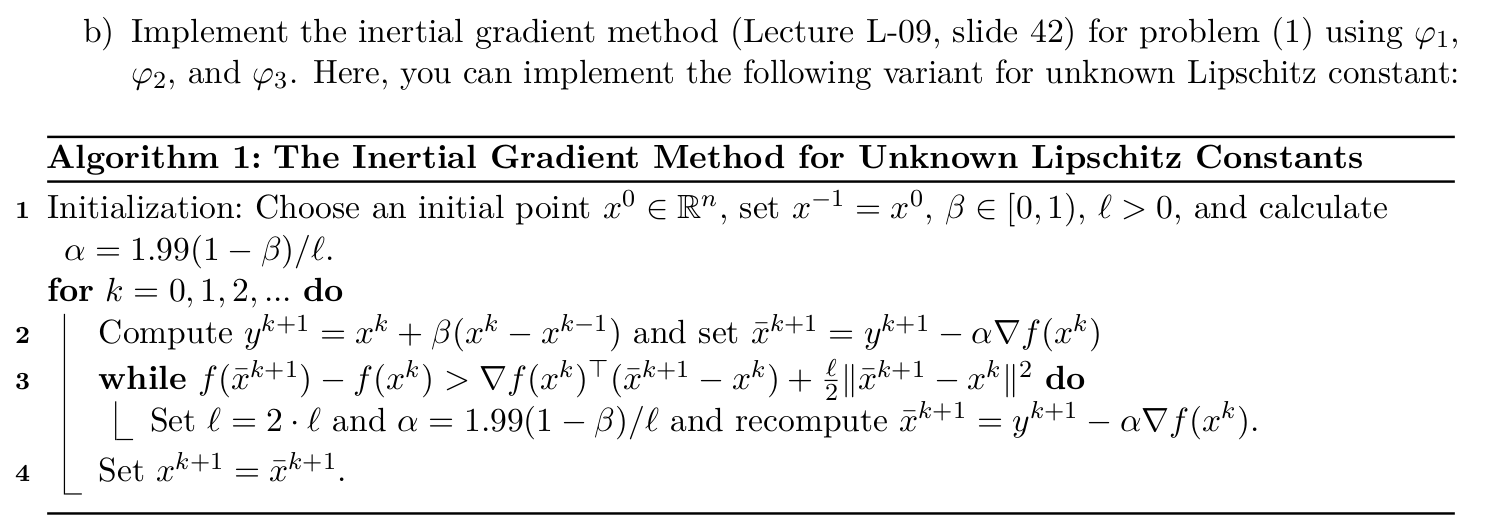
</div>

### IGM for problem(1) (for unknown Lipschitz Constants)

In [15]:
def IGM(f, f_grad, x_0: np.array, tol: float, max_iter: int, l: float):
    """
    Input: funtion: f, the gradient of f: f_grad, initial point: x_0, tolerence: tol,
           maximium iteration times: max_iter, l: should be positive  
           
    Output: 2-d list: result. Every element of result is a list for each iteration. 
            e.g. ['iteration k', 'x_k', 'stepsize alpha', 'f(x_k)', 'norm of f_grad(x_k)']

            and the x_k of the last step
    """
    x_pre = np.array(x_0.tolist())
    x_k = np.array(x_0.tolist()) #x_next
    k = 0

    beta = 0.8
    alpha = 1.99*(1-beta)/l 
   
    result = [['iteration k', 'alpha', 'f(x_k)', 'norm of f_grad(x_k)']]
    result.append([k, alpha, f(x_k), np.linalg.norm(f_grad(x_k))])
        
    while np.linalg.norm(f_grad(x_k)) > tol:
        #Remember to update y_k
        y_k = x_k + beta*(x_k - x_pre)
        
        
        #Remember to update x_pre!
        x_pre = np.array(x_k.tolist())

        x_k_bar = y_k - alpha*f_grad(x_k)

        while f(x_k_bar) - f(x_k) > np.transpose(f_grad(x_k)).dot((x_k_bar - x_k)) + 0.5*l*np.linalg.norm((x_k_bar - x_k))**2:
            l *= 2
            alpha = 1.99*(1-beta)/l
            x_k_bar = y_k - alpha*f_grad(x_k)

        x_k = np.array(x_k_bar.tolist())

        if k == max_iter:
            print('max iteration:',
                  k, 'the function value is', f(x_k), 'the norm of gradient is:', np.linalg.norm(f_grad(x_k)))
            break        
        
        k += 1
        
        result.append([k, alpha, f(x_k), np.linalg.norm(f_grad(x_k))])
        print(np.linalg.norm(f_grad(x_k)))
        
    return result, x_k

In [ ]:
#test for phi1
result = IGM(f=lambda x: f(x=x, mu=mu, phi=phi1), f_grad=lambda x: grad_non_reg(x) + grad_reg_phi1(x), x_0=x_0, tol=0.0001, max_iter=3000, l=0.1)

## Part c)

<div> 
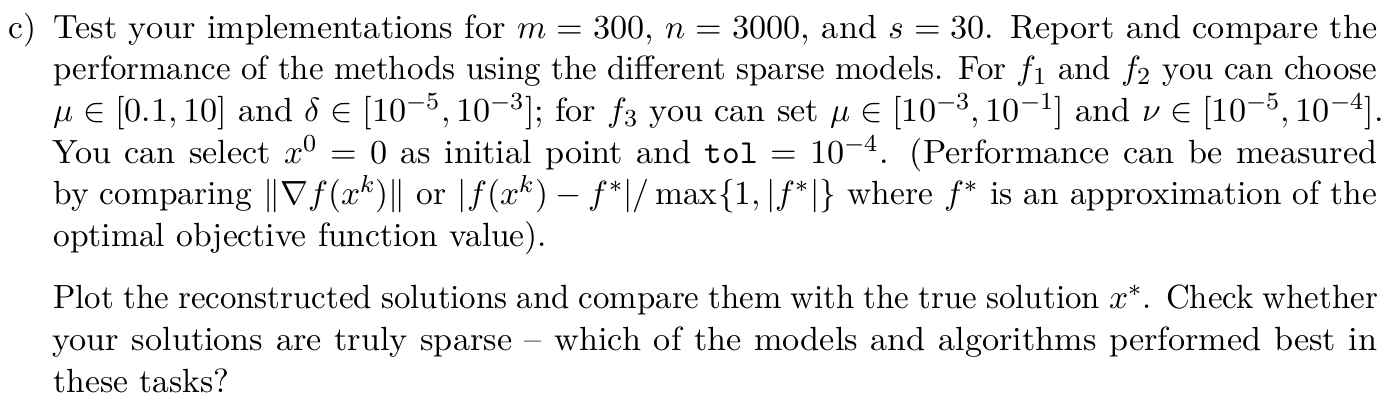
</div>